LEVEL 2 - TASK 1

PREDICTIVE MODELING

In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load Dataset
df = pd.read_csv("C:\\Users\\bunny\\OneDrive\\Technorank Internship\\houseprices.csv") 

In [14]:
# Initial Exploration
print(df.shape)
print(df.info())
print(df.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

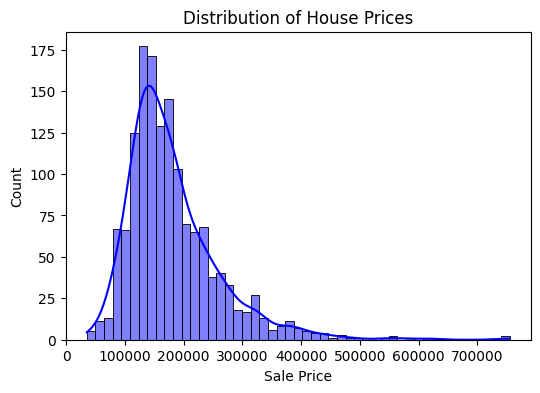

In [29]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

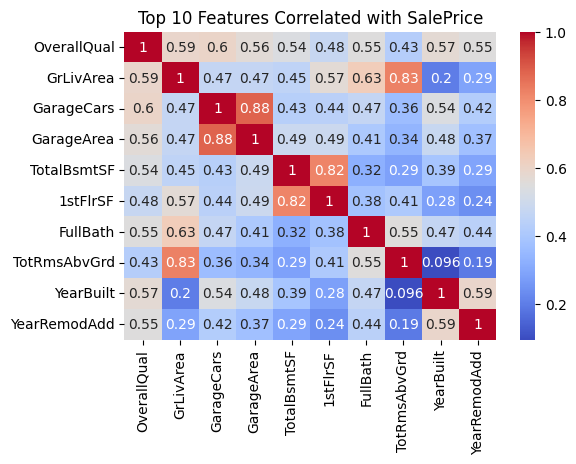

In [27]:
# Correlation Heatmap (Top 10 correlated with SalePrice)
plt.figure(figsize=(6, 4))

# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Top 10 features most positively correlated with SalePrice
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:11]  # Exclude SalePrice itself
sns.heatmap(numeric_df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

In [18]:
# Drop 'Id' column
df.drop(['Id'], axis=1, inplace=True)

In [19]:
# Handle Missing Values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [20]:
# Encode Categorical Variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [21]:
# Split Features and Target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

In [24]:
# Train & Evaluate Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
evaluate_model("Linear Regression", y_test, lr_preds)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
evaluate_model("Random Forest", y_test, rf_preds)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
evaluate_model("Gradient Boosting", y_test, gb_preds)

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
evaluate_model("XGBoost", y_test, xgb_preds)


Linear Regression Results:
MAE: 21580.191357661155
RMSE: 35312.1383447178
R² Score: 0.8374323228511331

Random Forest Results:
MAE: 17651.310958904112
RMSE: 28455.23457255085
R² Score: 0.894437296053954

Gradient Boosting Results:
MAE: 16949.709273130673
RMSE: 28211.146945566827
R² Score: 0.8962405521633966

XGBoost Results:
MAE: 16430.992321275684
RMSE: 25650.223726313387
R² Score: 0.9142234921455383


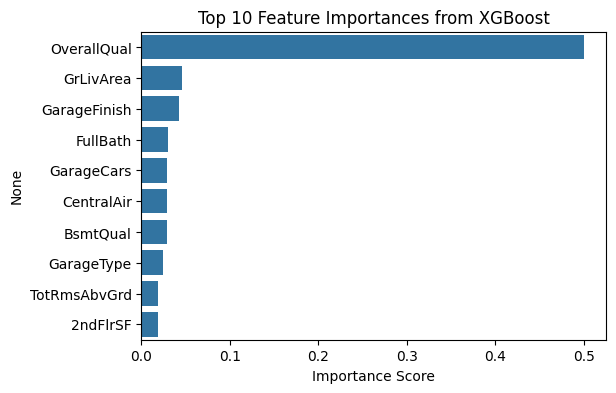

In [28]:
# Feature Importance from XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(6, 4))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index)
plt.title("Top 10 Feature Importances from XGBoost")
plt.xlabel("Importance Score")
plt.show()